**Speech Emotion Recognition using CNN**

In [ ]:
import librosa  #audio uploading/analysis,feature extraction
import librosa.display
import seaborn as sns    #ploting waveform,graph,confusion matrix
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd   #audio playback
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
Crema = "/content/drive/MyDrive/CRIMA D/AudioWAV/"
Tess = "/content/drive/MyDrive/TESS/TESS/"
Savee = "/content/drive/MyDrive/SAVEE1/"
ravdess = "/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/"

### TESS

In [ ]:
# List all files in the directory
import os
import pandas as pd
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

# Loop through the directories and files
for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        parts = file.split('.')[0].split('_')
        if len(parts) >= 3:
            part = parts[2]
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)

            file_path.append(os.path.join(Tess, dir, file))

# Creating DataFrame for emotions of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating DataFrame for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating the DataFrames
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Filter out rows with 'fear (1)' in the 'Emotions' column
Tess1_df = Tess_df[Tess_df['Emotions'] != 'fear (1)']

# Print the filtered DataFrame to see the result
print(Tess1_df.head())

# Print the value counts of 'Emotions' in the filtered DataFrame
print(Tess1_df['Emotions'].value_counts())

# Tess1_df = Tess_df[Tess_df['Emotions'] != 'fear (01)']
# print(Tess1_df.head())

# # Print the filtered DataFrame to see the result

# # print(Tess_df.head())
# print(Tess1_df.Emotions.value_counts())

  Emotions                                               Path
0      sad  /content/drive/MyDrive/TESS/TESS/YAF_sad/YAF_b...
1      sad  /content/drive/MyDrive/TESS/TESS/YAF_sad/YAF_c...
2      sad  /content/drive/MyDrive/TESS/TESS/YAF_sad/YAF_b...
3      sad  /content/drive/MyDrive/TESS/TESS/YAF_sad/YAF_c...
4      sad  /content/drive/MyDrive/TESS/TESS/YAF_sad/YAF_c...
sad         400
happy       400
surprise    400
fear        400
neutral     400
disgust     400
angry       400
Name: Emotions, dtype: int64


### SAVEE

In [ ]:
# Savee
savee_subfolders = os.listdir(Savee)

file_emotion = []
file_path = []
unknown_files = []

for subfolder in savee_subfolders:
    subfolder_path = os.path.join(Savee, subfolder)
    if os.path.isdir(subfolder_path):
        files = os.listdir(subfolder_path)
        for file in files:
            try:
                # Extracting the initial letters to determine the emotion class
                file_name = os.path.splitext(file)[0]  # Removing the file extension
                emotion_code = file_name.split('_')[0] if '_' in file_name else file_name[0]
                if emotion_code == 'a':
                    file_emotion.append('angry')
                elif emotion_code == 'd':
                    file_emotion.append('disgust')
                elif emotion_code == 'f':
                    file_emotion.append('fear')
                elif emotion_code == 'S':
                    file_emotion.append('sad')
                elif emotion_code == 'h':
                    file_emotion.append('happy')
                elif emotion_code == 'n':
                    file_emotion.append('neutral')
                else:
                    file_emotion.append('surprise')
                # Constructing full file path
                file_path.append(os.path.join(subfolder_path, file))
            except Exception as e:
                print(f"Error processing file {file}: {e}")
                unknown_files.append(file)  # Store the filenames causing Unknown emotions

# Creating DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating DataFrame for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating the DataFrames
Savee_df = pd.concat([emotion_df, path_df], axis=1)

filtered_Savee_df = Savee_df[Savee_df['Emotions'] != 'Unknown']

# Print the filtered DataFrame to see the result
print(filtered_Savee_df.head())

# Print the filtered value counts of emotions for verification
print(filtered_Savee_df.Emotions.value_counts())


  Emotions                                      Path
0    angry  /content/drive/MyDrive/SAVEE1/JK/a08.wav
1    angry  /content/drive/MyDrive/SAVEE1/JK/a10.wav
2    angry  /content/drive/MyDrive/SAVEE1/JK/a02.wav
3  disgust  /content/drive/MyDrive/SAVEE1/JK/d05.wav
4    angry  /content/drive/MyDrive/SAVEE1/JK/a07.wav
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


### CRIMA D

In [ ]:
file_emotion = []
file_path = []

for file in os.listdir(Crema):
    if file.endswith(".wav"):
        # Extracting emotion from the filename
        parts = file.split('_')[2]
        if len(parts) > 1:
            emotion_code = parts.lower()  # Convert to lowercase for consistent comparison
            if emotion_code == 'sad':
                file_emotion.append('sad')
            elif emotion_code == 'ang':
                file_emotion.append('angry')
            elif emotion_code == 'dis':
                file_emotion.append('disgust')
            elif emotion_code == 'fea':
                file_emotion.append('fear')
            elif emotion_code == 'hap':
                file_emotion.append('happy')
            elif emotion_code == 'neu':
                file_emotion.append('neutral')
            else:
                file_emotion.append('Unknown')
            # Constructing full file path
            file_path.append(os.path.join(Crema, file))

# Creating DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating DataFrame for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating the DataFrames
Crema_df = pd.concat([emotion_df, path_df], axis=1)
crema1_df = Crema_df.drop_duplicates()
# print(Crema_df.head())

# Print the value counts of emotions for verification
print(crema1_df.Emotions.value_counts())

fear       1285
disgust    1284
happy      1281
angry      1280
sad        1279
neutral    1095
Name: Emotions, dtype: int64


### RAVDESS

In [ ]:
ravdess_directory_list = os.listdir(ravdess)
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(ravdess + i))
#     print(actor)
    for f in actor:
        part = f.split('.')[0].split('-')

    # third part in each file represents the emotion associated to that file.
        if len(part) >= 3:
            emotion =int(part[2])
            file_emotion.append(emotion)
        file_path.append(os.path.join(ravdess,i,f))
# print("Emotion Labels:", file_emotion[:7])  # Print the first 5 emotion labels for verification
# print("File Paths:", file_path[:5])

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
# print(ravdess_df.tail())
# print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
1  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
2    happy  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
3  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
4  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
______________________________________________
neutral     288
happy       192
angry       192
sad         192
disgust     192
fear        192
surprise    192
Name: Emotions, dtype: int64


 ### Integrating datasets

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df,Tess1_df,filtered_Savee_df], axis = 0)
data_path.to_csv("/content/drive/MyDrive/dataset_path.csv",index=False)
print(data_path.head())

  Emotions                                               Path
0  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
1  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
2    happy  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
3  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...
4  neutral  /content/drive/MyDrive/RAVDESS/audio_speech_ac...


In [ ]:
print(data_path.Emotions.value_counts())

neutral     808
happy       652
angry       652
sad         652
disgust     652
fear        652
surprise    652
Name: Emotions, dtype: int64


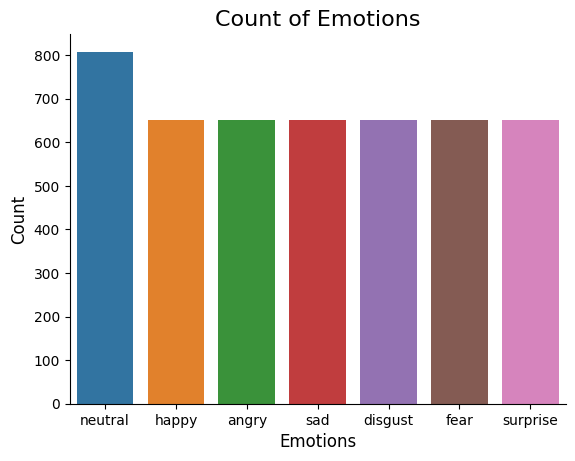

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(x =data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

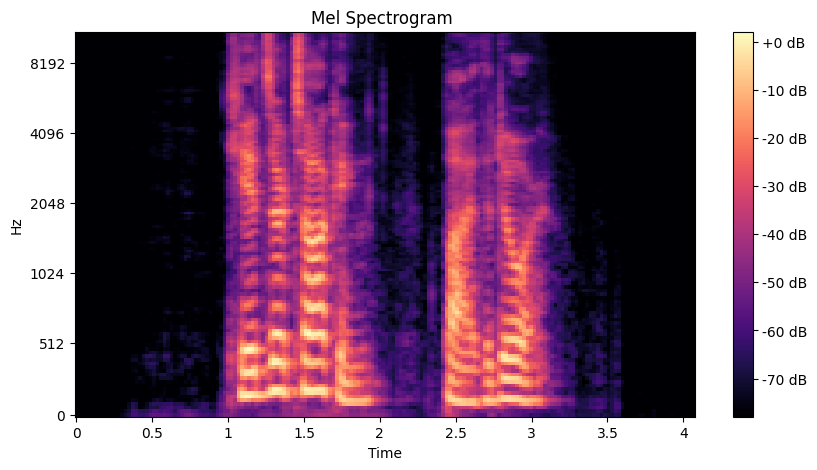

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

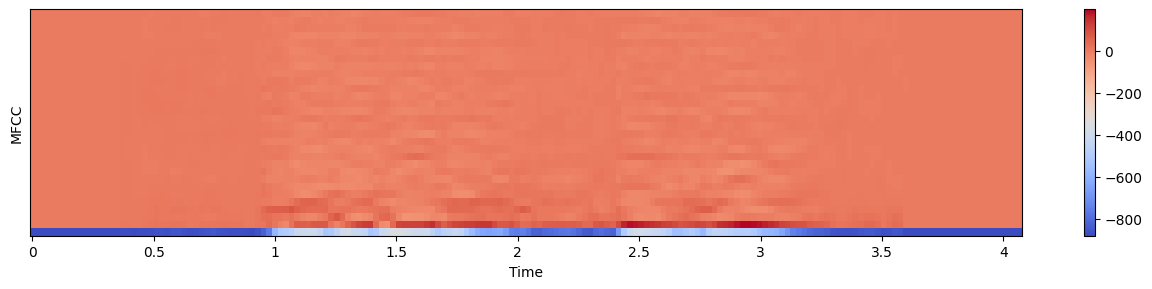

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

### DATA AUGUMENTATION

In [ ]:
pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import audiomentations
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    # Stretch the audio data
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data


# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

from audiomentations import Compose, PitchShift
#PITCH
def pitch(data,sample_rate):
    transform = Compose([
    PitchShift( p = 1) # pitch shift by n_steps semitones
    ])
    # Apply the transformation to the audio signal
    y = transform(data, sample_rate=sr)
    return y

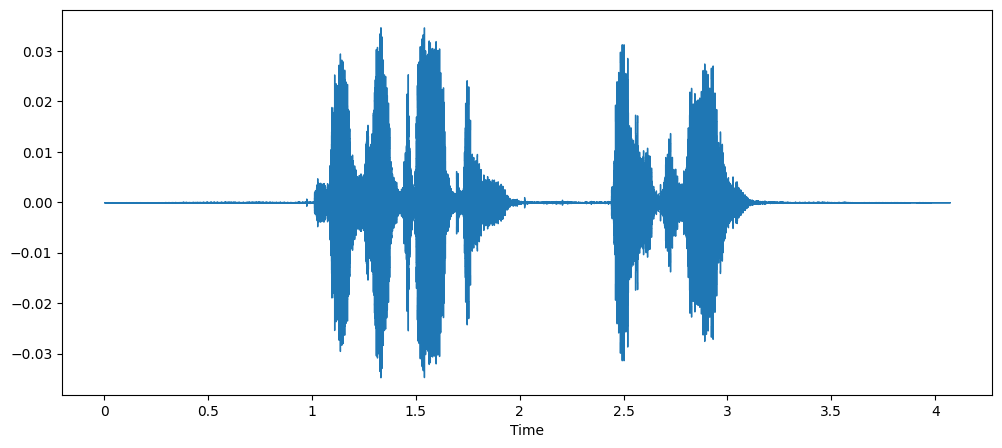

In [ ]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

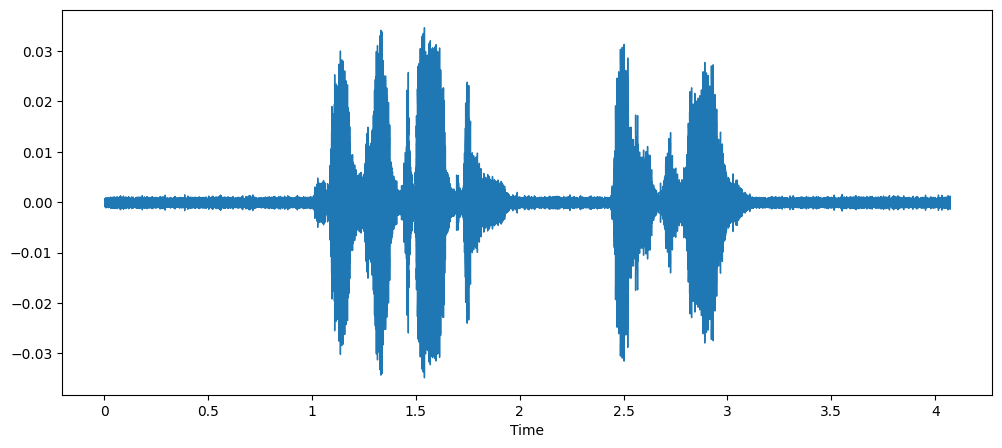

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

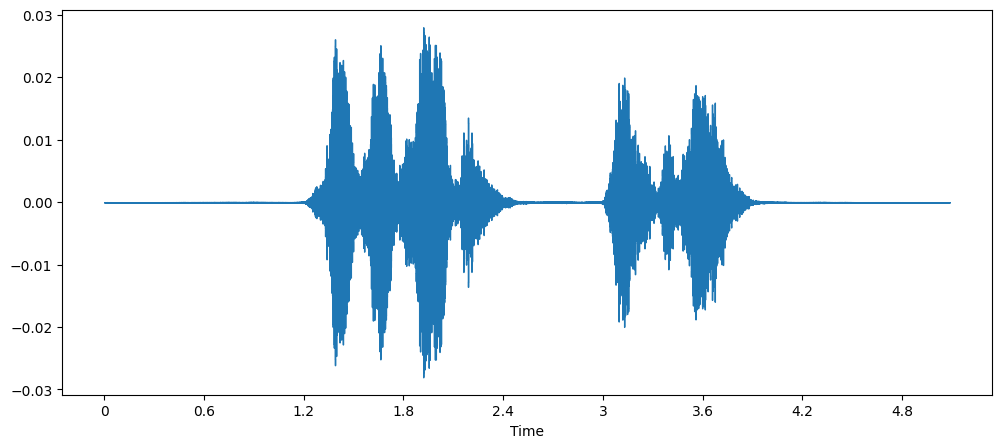

In [ ]:
# STRETCHED AUDIO
x = librosa.effects.time_stretch(data, rate=0.8)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

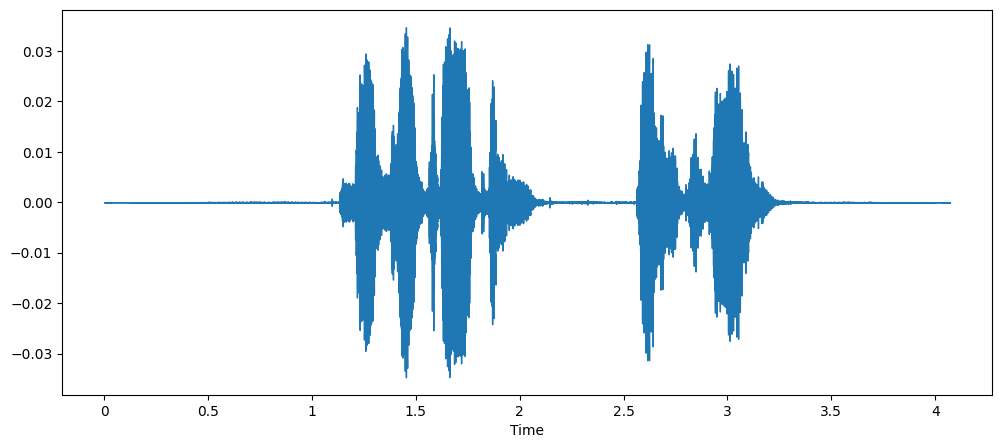

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

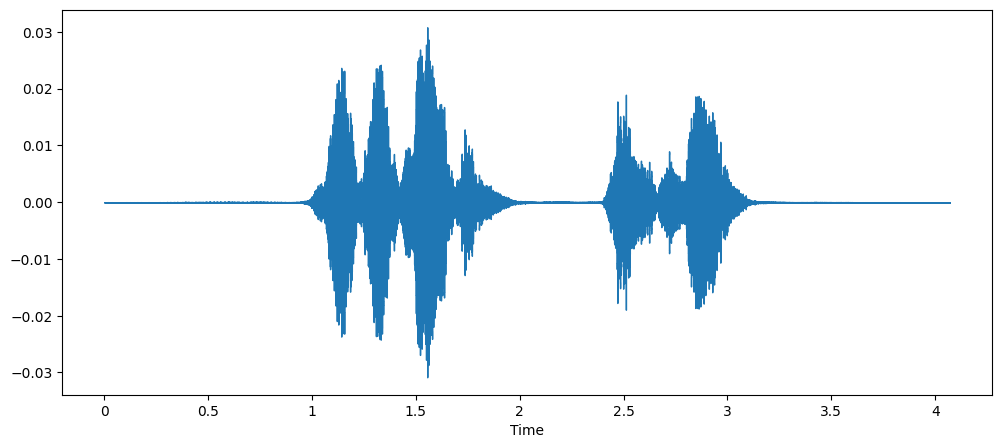

In [ ]:
#PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

### FEATURE EXTRACTION

In [ ]:
n_fft = 2048
hop_length = 512

In [ ]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


# def spc_entropy(data, sr):
#     spc_en = spectral_entropy(data, sf=sr, method="fft")
#     return spc_en

def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [ ]:
path = np.array(data_path.Path)[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

55125

In [ ]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sr).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sr).shape)
print("Chroma STFT: ", chroma_stft(data, sr).shape)
print("MelSpectrogram: ", mel_spc(data, sr).shape)
print("MFCC: ", mfcc(data, sr).shape)

ZCR:  (108,)
Energy:  (108,)
Entropy of Energy : (108,)
RMS : (108,)
Spectral Centroid : (108,)
Spectral Flux:  ()
Spectral Rollof:  (108,)
Chroma STFT:  (1296,)
MelSpectrogram:  (13824,)
MFCC:  (2160,)


In [ ]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        # np.mean(energy(data, frame_length, hop_length),axis=0),
                        # np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0),
                        rmse(data, frame_length, hop_length),
                        # spc(data, sr, frame_length, hop_length),
                        # spc_entropy(data, sr),
                        # spc_flux(data),
                        # spc_rollof(data, sr, frame_length, hop_length),
                        chroma_stft(data, sr, frame_length, hop_length),
                        # mel_spc(data, sr, frame_length, hop_length, flatten=True),
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [ ]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate)
    data_noise_pitch = noise(new_data)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
print("Extracting Features...")
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))


# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)
stop = timeit.default_timer()
print('Time: ', stop - start)

Extracting Features...
Time:  1665.061505752


In [ ]:

len(X), len(Y), data_path.Path.shape

(18880, 18880, (4720,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('/content/drive/MyDrive/emotion.csv', index=False)
Emotions.head()



,0,1,2,3,4,5,6,7,8,9,...,3663,3664,3665,3666,3667,3668,3669,3670,3671,Emotions
0,0.238770,0.409180,0.540039,0.509277,0.424805,0.301758,0.262207,0.306641,0.379883,0.474121,...,-23.921593,-7.130045,-1.626487,1.765229,6.750570,-1.896502,-1.044784,-0.090781,9.221346,neutral
1,0.247070,0.364258,0.500000,0.512207,0.502930,0.508301,0.498047,0.487305,0.500488,0.505859,...,-7.185844,-6.456519,7.627026,1.916797,-2.874260,-3.128884,-0.226524,1.402491,3.476512,neutral
2,0.163574,0.256836,0.334961,0.291992,0.257324,0.212891,0.214844,0.220703,0.242188,0.248535,...,-21.081728,-2.786711,-3.319760,0.871092,-0.697870,-7.411703,-6.215679,0.919557,3.569928,neutral
3,0.252930,0.382324,0.505371,0.492188,0.480957,0.478027,0.474121,0.488770,0.501953,0.501465,...,-3.824845,-11.561147,-5.291347,1.055057,5.267591,0.023220,-6.211295,-2.656113,4.839918,neutral
4,0.289551,0.361328,0.428223,0.401367,0.285156,0.353516,0.342285,0.334961,0.412598,0.375000,...,2.961004,3.437249,3.902438,3.884648,3.430717,3.047014,3.253165,4.039723,4.731607,neutral


In [ ]:
import pandas as pd
Emotions = pd.read_csv('/content/drive/MyDrive/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,3663,3664,3665,3666,3667,3668,3669,3670,3671,Emotions
0,0.238770,0.409180,0.540039,0.509277,0.424805,0.301758,0.262207,0.306641,0.379883,0.474121,...,-23.921593,-7.130045,-1.626487,1.765229,6.750570,-1.896502,-1.044784,-0.090781,9.221346,neutral
1,0.247070,0.364258,0.500000,0.512207,0.502930,0.508301,0.498047,0.487305,0.500488,0.505859,...,-7.185844,-6.456519,7.627026,1.916797,-2.874260,-3.128884,-0.226524,1.402491,3.476512,neutral
2,0.163574,0.256836,0.334961,0.291992,0.257324,0.212891,0.214844,0.220703,0.242188,0.248535,...,-21.081728,-2.786711,-3.319760,0.871092,-0.697870,-7.411703,-6.215679,0.919557,3.569928,neutral
3,0.252930,0.382324,0.505371,0.492188,0.480957,0.478027,0.474121,0.488770,0.501953,0.501465,...,-3.824845,-11.561147,-5.291347,1.055057,5.267591,0.023220,-6.211295,-2.656113,4.839918,neutral
4,0.289551,0.361328,0.428223,0.401367,0.285156,0.353516,0.342285,0.334961,0.412598,0.375000,...,2.961004,3.437249,3.902438,3.884648,3.430717,3.047014,3.253165,4.039723,4.731607,neutral


In [ ]:

print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
3668         True
3669         True
3670         True
3671         True
Emotions    False
Length: 3673, dtype: bool


In [ ]:
# # Fill NaN with 0
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
3668        False
3669        False
3670        False
3671        False
Emotions    False
Length: 3673, dtype: bool


(18880, 3673)

In [ ]:
import numpy as np
np.sum(Emotions.isna())


0           0
1           0
2           0
3           0
4           0
           ..
3668        0
3669        0
3670        0
3671        0
Emotions    0
Length: 3673, dtype: int64

### DATA PREPARATION

In [ ]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape
# Y

(18880, 7)


(18880, 3672)

In [ ]:
X

array([[ 0.23876953,  0.40917969,  0.54003906, ..., -1.04478395,
        -0.09078133,  9.2213459 ],
       [ 0.24707031,  0.36425781,  0.5       , ..., -0.22652353,
         1.40249062,  3.47651181],
       [ 0.16357422,  0.25683594,  0.33496094, ..., -6.21567869,
         0.9195568 ,  3.56992769],
       ...,
       [ 0.02197266,  0.03076172,  0.05224609, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01806641,  0.02636719,  0.03417969, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02294922,  0.03759766,  0.05517578, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and temporary set (combined testing and validation)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Splitting temporary set into testing and validation sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print the shapes to verify the split
print("Training Data - Features:", x_train.shape, "Labels:", y_train.shape)
print("Validation Data - Features:", x_val.shape, "Labels:", y_val.shape)
print("Testing Data - Features:", x_test.shape, "Labels:", y_test.shape)


Training Data - Features: (13216, 3672) Labels: (13216, 7)
Validation Data - Features: (2832, 3672) Labels: (2832, 7)
Testing Data - Features: (2832, 3672) Labels: (2832, 7)


In [ ]:
import numpy as np

# Reshape the MFCC feature arrays for input to deep learning models
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Print the shapes to verify the split and reshaping
print("Training Data - Features:", X_train.shape, "Labels:", y_train.shape)
print("Validation Data - Features:", X_val.shape, "Labels:", y_val.shape)
print("Testing Data - Features:", X_test.shape, "Labels:", y_test.shape)


Training Data - Features: (13216, 3672, 1) Labels: (13216, 7)
Validation Data - Features: (2832, 3672, 1) Labels: (2832, 7)
Testing Data - Features: (2832, 3672, 1) Labels: (2832, 7)


In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13216, 3672), (13216, 7), (2832, 3672), (2832, 7))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

### CNN MODEL

In [ ]:
#Reshape for CNN_LSTM MODEL
x_traincnn =np.expand_dims(x_train, axis=2)
x_val_cnn = np.expand_dims(x_val, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape


((13216, 3672, 1), (13216, 7), (2832, 3672, 1), (2832, 7))

In [ ]:
import tensorflow.keras.layers as L
import tensorflow as tf


model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3672, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 3672, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1836, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1836, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1836, 512)         2048      
 chNormalization)                                                
                                                        

In [ ]:

# history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test),
#                   batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

import os

# Check if the file containing epoch count exists
  if os.path.exists('/content/drive/MyDrive/epoch_count.txt'):
      # If the file exists, read the epoch count from the file
      with open('/content/drive/MyDrive/epoch_count.txt', 'r') as file:
          initial_epoch = int(file.read())
  else:
      # If the file doesn't exist, start from epoch 0
      initial_epoch = 0

  # Train the model starting from the last completed epoch
  history = model.fit(
      x_traincnn, y_train,
      epochs=30,  # Total number of epochs you want to train for
      initial_epoch=initial_epoch,  # Start training from the last completed epoch
      validation_data=(x_testcnn, y_test),
      batch_size=64,
      callbacks=[early_stop, lr_reduction, model_checkpoint]
  )
  # Get the last completed epoch from the history object
  last_completed_epoch = len(history.history['loss']) + initial_epoch
  # Save the last completed epoch to the file
  with open('/content/drive/MyDrive/epoch_count.txt', 'w') as file:
      file.write(str(last_completed_epoch))




Epoch 1/30
207/207 [==============================] - ETA: 0s - loss: 1.1605 - accuracy: 0.5939

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


207/207 [==============================] - 135s 544ms/step - loss: 1.1605 - accuracy: 0.5939 - val_loss: 3.0153 - val_accuracy: 0.1744 - lr: 0.0010
Epoch 2/30
207/207 [==============================] - 119s 575ms/step - loss: 0.7096 - accuracy: 0.7424 - val_loss: 3.1138 - val_accuracy: 0.2768 - lr: 0.0010
Epoch 3/30
207/207 [==============================] - 111s 534ms/step - loss: 0.5598 - accuracy: 0.7966 - val_loss: 0.6746 - val_accuracy: 0.7444 - lr: 0.0010
Epoch 4/30
207/207 [==============================] - 119s 575ms/step - loss: 0.4487 - accuracy: 0.8372 - val_loss: 0.5451 - val_accuracy: 0.7998 - lr: 0.0010
Epoch 5/30
207/207 [==============================] - 109s 525ms/step - loss: 0.3576 - accuracy: 0.8706 - val_loss: 0.9297 - val_accuracy: 0.7256 - lr: 0.0010
Epoch 6/30
207/207 [==============================] - 113s 545ms/step - loss: 0.2885 - accuracy: 0.8977 - val_loss: 1.0189 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 7/30
207/207 [==============================] - 111

89/89 [==============================] - 7s 73ms/step - loss: 0.1799 - accuracy: 0.9477
Accuracy of our model on test data :  94.77401375770569 %


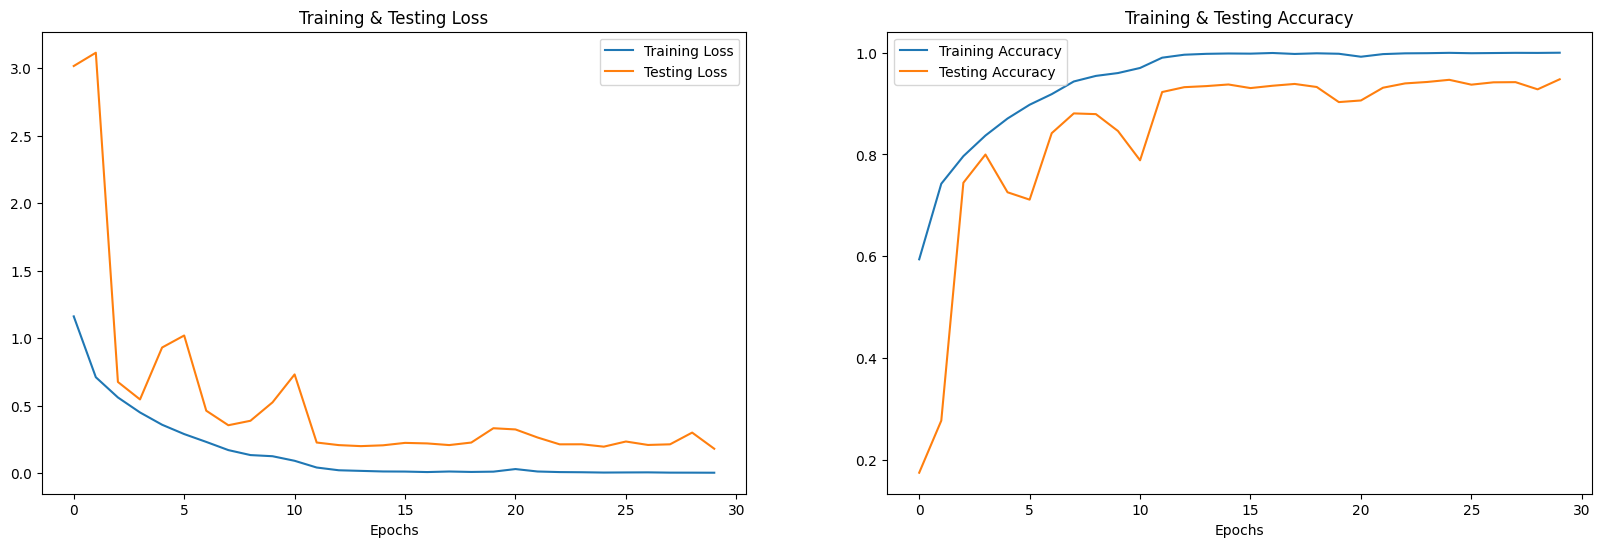

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

89/89 [==============================] - 7s 72ms/step


,Predicted Labels,Actual Labels
0,sad,sad
1,sad,sad
2,surprise,surprise
3,disgust,disgust
4,sad,sad
5,surprise,surprise
6,disgust,disgust
7,disgust,disgust
8,surprise,surprise
9,neutral,neutral


In [ ]:
df0

,Predicted Labels,Actual Labels
0,sad,sad
1,sad,sad
2,surprise,surprise
3,disgust,disgust
4,sad,sad
...,...,...
2827,fear,fear
2828,angry,happy
2829,fear,fear
2830,angry,angry


### EVALUATION

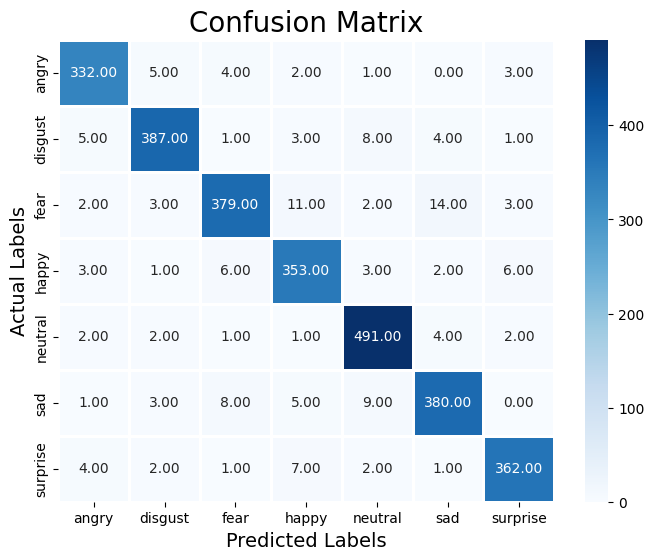

              precision    recall  f1-score   support

       angry       0.95      0.96      0.95       347
     disgust       0.96      0.95      0.95       409
        fear       0.95      0.92      0.93       414
       happy       0.92      0.94      0.93       374
     neutral       0.95      0.98      0.96       503
         sad       0.94      0.94      0.94       406
    surprise       0.96      0.96      0.96       379

    accuracy                           0.95      2832
   macro avg       0.95      0.95      0.95      2832
weighted avg       0.95      0.95      0.95      2832



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

### SAVING MODEL

In [ ]:

from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("/content/drive/MyDrive/CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/CNN_model_weights.h5")
print("model is saved")

model is saved


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/drive/MyDrive/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CNN_model_weights.h5")
print("model is Loaded")

model is Loaded


In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

89/89 [==============================] - 7s 76ms/step - loss: 0.1799 - accuracy: 0.9477
accuracy: 94.77%


### Saving and Loading our Standard Scaler and encoder

In [ ]:
import pickle

# Saving scaler
with open('/content/drive/MyDrive/scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('/content/drive/MyDrive/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('/content/drive/MyDrive/encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('/content/drive/MyDrive/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)
print("Done")

Done


### test script

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/drive/MyDrive/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CNN_model_weights.h5")
print("Loaded model")

Loaded model


In [ ]:
import pickle

with open('/content/drive/MyDrive/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
with open('/content/drive/MyDrive/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)
print("Done")

Done


In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
# def rmse(data,frame_length=2048,hop_length=512):
#     rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
#     return np.squeeze(rmse)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
# def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
#     mfcc=librosa.feature.mfcc(data,sr=sr)
#     return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)
def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      chroma_stft(data, sr, frame_length, hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:


import librosa

def get_predict_feat(path, expected_shape=3672):
    # Load audio file
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Extract features
    res = extract_features(d, s_rate)

    # Pad or truncate features to match the expected shape
    padding_size = max(0, expected_shape - len(res))
    padded_features = np.pad(res, (0, padding_size), 'constant')[:expected_shape]

    # Reshape and scale the processed features
    padded_features = np.reshape(padded_features, newshape=(1, expected_shape))
    scaled_features = scaler2.transform(padded_features)
    final_features = np.expand_dims(scaled_features, axis=2)

    return final_features



In [ ]:
import numpy as np
res=get_predict_feat("/content/drive/MyDrive/TESS/OAF_Fear/OAF_back_fear.wav")
print(res.shape)

(1, 3672, 1)


In [ ]:
emotions1={1:'Neutral', 2:'Happy', 3:'Sad', 4:'Angry', 5:'Fear', 6:'Disgust',7:'Surprise'}
def prediction(path2):
    res=get_predict_feat(path2)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_02/03-01-01-01-01-01-02.wav")

1/1 [==============================] - 7s 7s/step
neutral


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav")

1/1 [==============================] - 0s 27ms/step
neutral


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_01/03-01-05-01-02-02-01.wav")

1/1 [==============================] - 0s 51ms/step
angry


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_02/03-01-06-01-02-02-02.wav")

1/1 [==============================] - 0s 83ms/step
fear


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_01/03-01-08-01-01-01-01.wav")

1/1 [==============================] - 0s 48ms/step
surprise


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_01/03-01-07-01-01-01-01.wav")

1/1 [==============================] - 0s 30ms/step
disgust


In [ ]:
prediction("/content/drive/MyDrive/RAVDESS/Actor_21/03-01-04-02-02-02-21.wav")

1/1 [==============================] - 0s 30ms/step
sad


In [ ]:
prediction("/content/drive/MyDrive/SAVEE1/DC/S01.wav")

1/1 [==============================] - 0s 54ms/step
sad


In [ ]:
prediction("/content/drive/MyDrive/SAVEE1/DC/f11.wav")

1/1 [==============================] - 0s 41ms/step
fear


In [ ]:
prediction("/content/drive/MyDrive/TESS/OAF_Fear/OAF_back_fear.wav")

1/1 [==============================] - 0s 32ms/step
fear


In [ ]:
prediction("/content/drive/MyDrive/CRIMA D/AudioWAV/1001_DFA_ANG_XX.wav")

1/1 [==============================] - 0s 91ms/step
disgust


In [ ]:
prediction("/content/drive/MyDrive/CRIMA D/AudioWAV/1001_DFA_DIS_XX.wav")

1/1 [==============================] - 0s 56ms/step
disgust


In [ ]:
prediction("/content/drive/MyDrive/CRIMA D/AudioWAV/1001_DFA_SAD_XX.wav")

1/1 [==============================] - 0s 54ms/step
disgust


In [ ]:
prediction("/content/drive/MyDrive/CRIMA D/AudioWAV/1001_IEO_HAP_HI.wav")

1/1 [==============================] - 0s 28ms/step
surprise


In [ ]:
prediction("/content/drive/MyDrive/CRIMA D/AudioWAV/1001_IEO_NEU_XX.wav")

1/1 [==============================] - 0s 78ms/step
neutral


In [ ]:
prediction("/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_bar_ps.wav")

1/1 [==============================] - 0s 94ms/step
surprise


In [ ]:
prediction("/content/drive/MyDrive/TESS/OAF_angry/OAF_germ_angry.wav")

1/1 [==============================] - 0s 53ms/step
angry


In [ ]:
prediction("/content/drive/MyDrive/TESS/OAF_angry/OAF_bite_angry.wav")

1/1 [==============================] - 0s 37ms/step
angry
